In [29]:
%pylab inline
import numpy as np
from conway99 import *
import pickle

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


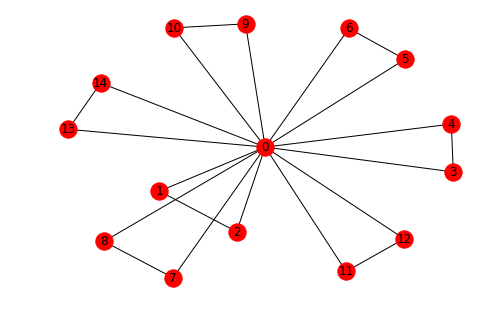

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

wlog, we let this be a neighbour of vertex 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


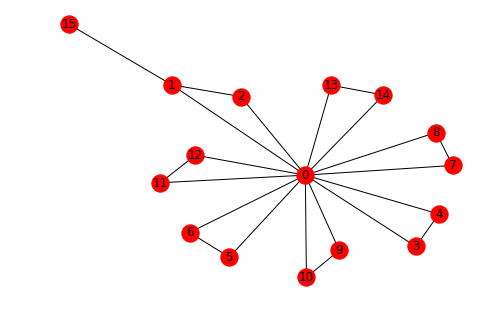

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15)])
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Adding branch 1 candidate
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Branch 0 yielded valid graph
Branch 1 invalid


In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps for 1 candidates


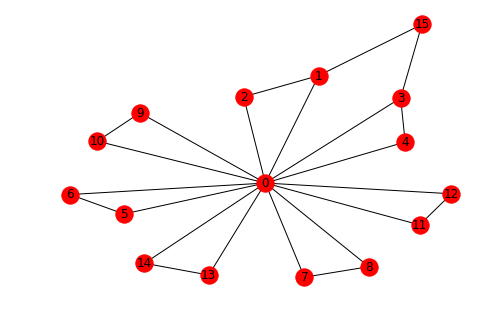

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


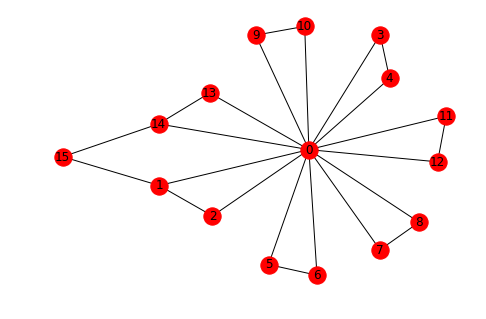

In [9]:
# alternative template 
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15), (15,14)])
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Branch 0 yielded valid graph
Branch 1 invalid
Wall time: 7.98 ms


In [11]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs([seed15], forced_edges=[(1,15), (15,14)])

2020-05-07 07:59:22.236971: Starting with 1 seeds
2020-05-07 07:59:22.241957: 1 valid graphs from templates
	1 reps for 1 candidates
2020-05-07 07:59:22.241957: Reduced to 1 representatives
Wall time: 4.99 ms


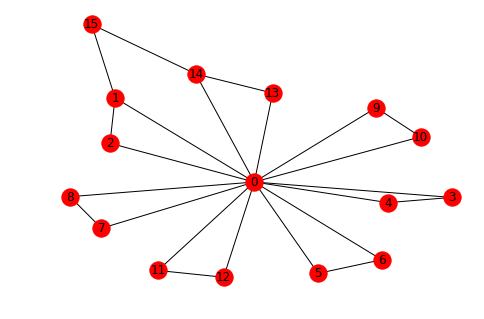

In [12]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We proceed with a similar approach to the other search, but now handled as part of the logic instead of prescribing (non-)edges. 

Specifically, this version identifies the unsaturated vertex _v_ of highest degree, picking the lowest index one if there are multiples. We then iterate over the vertices u=0,1,2,...; checking whether the correct number of mutual neighbours are present (1 if u neighbours v, 2 if it does not). We pick the minimal u such that there is a missing mutual neighbour with v, and set our newly added vertex to be that mutual neighbour. 

In [13]:
%time rep17 = find_valid_supergraphs_greedy(rep16)

2020-05-07 07:59:22.332714: Starting with 1 seeds
2020-05-07 07:59:22.339696: 2 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
2020-05-07 07:59:22.340693: Reduced to 2 representatives
Wall time: 7.98 ms


In [14]:
%time rep18 = find_valid_supergraphs_greedy(rep17)

2020-05-07 07:59:22.346677: Starting with 2 seeds
2020-05-07 07:59:22.361637: 4 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
2020-05-07 07:59:22.362634: Reduced to 3 representatives
Wall time: 16 ms


In [15]:
%time rep19 = find_valid_supergraphs_greedy(rep18)

2020-05-07 07:59:22.367623: Starting with 3 seeds
2020-05-07 07:59:22.398539: 8 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 5 candidates
	5 reps for 7 candidates
	6 reps for 8 candidates
2020-05-07 07:59:22.400532: Reduced to 6 representatives
Wall time: 32.9 ms


In [16]:
%time rep20 = find_valid_supergraphs_greedy(rep19)

2020-05-07 07:59:22.405520: Starting with 6 seeds
2020-05-07 07:59:22.477327: 16 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 4 candidates
	4 reps for 9 candidates
	5 reps for 11 candidates
	6 reps for 12 candidates
	7 reps for 16 candidates
2020-05-07 07:59:22.480319: Reduced to 7 representatives
Wall time: 74.8 ms


In [17]:
%time rep21 = find_valid_supergraphs_greedy(rep20)

2020-05-07 07:59:22.485346: Starting with 7 seeds
2020-05-07 07:59:22.588034: 24 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 4 candidates
	5 reps for 5 candidates
	6 reps for 7 candidates
	7 reps for 8 candidates
	8 reps for 9 candidates
	9 reps for 12 candidates
	10 reps for 13 candidates
	11 reps for 17 candidates
	12 reps for 19 candidates
	13 reps for 22 candidates
	14 reps for 23 candidates
	15 reps for 24 candidates
2020-05-07 07:59:22.593019: Reduced to 15 representatives
Wall time: 108 ms


In [18]:
%time rep22 = find_valid_supergraphs_greedy(rep21)

2020-05-07 07:59:22.598005: Starting with 15 seeds
2020-05-07 07:59:22.844377: 51 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 9 candidates
	5 reps for 10 candidates
	6 reps for 14 candidates
	7 reps for 15 candidates
	8 reps for 19 candidates
	9 reps for 24 candidates
	10 reps for 26 candidates
	11 reps for 27 candidates
	12 reps for 38 candidates
	13 reps for 39 candidates
	14 reps for 47 candidates
	15 reps for 51 candidates
2020-05-07 07:59:22.853323: Reduced to 15 representatives
Wall time: 255 ms


In [19]:
%time rep23 = find_valid_supergraphs_greedy(rep22)

2020-05-07 07:59:22.859306: Starting with 15 seeds
2020-05-07 07:59:23.194443: 60 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 4 candidates
	5 reps for 5 candidates
	6 reps for 7 candidates
	7 reps for 8 candidates
	8 reps for 9 candidates
	9 reps for 10 candidates
	10 reps for 11 candidates
	11 reps for 13 candidates
	12 reps for 15 candidates
	13 reps for 16 candidates
	14 reps for 19 candidates
	15 reps for 21 candidates
	16 reps for 22 candidates
	17 reps for 24 candidates
	18 reps for 25 candidates
	19 reps for 26 candidates
	20 reps for 27 candidates
	21 reps for 30 candidates
	22 reps for 31 candidates
	23 reps for 35 candidates
	24 reps for 37 candidates
	25 reps for 40 candidates
	26 reps for 41 candidates
	27 reps for 47 candidates
	28 reps for 49 candidates
	29 reps for 54 candidates
	30 reps for 55 candidates
	31 reps for 58 candidates
	32 reps for 59 candidates
	33 reps for 60 candidates
2020-05-07 07:59

In [20]:
%time rep24 = find_valid_supergraphs_greedy(rep23)

2020-05-07 07:59:23.213360: Starting with 33 seeds
2020-05-07 07:59:23.985296: 131 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 4 candidates
	4 reps for 9 candidates
	5 reps for 10 candidates
	6 reps for 14 candidates
	7 reps for 15 candidates
	8 reps for 19 candidates
	9 reps for 22 candidates
	10 reps for 23 candidates
	11 reps for 28 candidates
	12 reps for 30 candidates
	13 reps for 31 candidates
	14 reps for 47 candidates
	15 reps for 48 candidates
	16 reps for 59 candidates
	17 reps for 63 candidates
	18 reps for 68 candidates
	19 reps for 70 candidates
	20 reps for 71 candidates
	21 reps for 80 candidates
	22 reps for 82 candidates
	23 reps for 83 candidates
	24 reps for 91 candidates
	25 reps for 106 candidates
	26 reps for 107 candidates
	27 reps for 119 candidates
	28 reps for 127 candidates
	29 reps for 131 candidates
2020-05-07 07:59:24.010230: Reduced to 29 representatives
Wall time: 797 ms


In [21]:
%time rep25 = find_valid_supergraphs_greedy(rep24)

2020-05-07 07:59:24.015218: Starting with 29 seeds
2020-05-07 07:59:24.893868: 134 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 4 candidates
	5 reps for 5 candidates
	6 reps for 7 candidates
	7 reps for 8 candidates
	8 reps for 9 candidates
	9 reps for 10 candidates
	10 reps for 11 candidates
	11 reps for 12 candidates
	12 reps for 13 candidates
	13 reps for 15 candidates
	14 reps for 16 candidates
	15 reps for 19 candidates
	16 reps for 21 candidates
	17 reps for 22 candidates
	18 reps for 24 candidates
	19 reps for 25 candidates
	20 reps for 26 candidates
	21 reps for 27 candidates
	22 reps for 28 candidates
	23 reps for 29 candidates
	24 reps for 31 candidates
	25 reps for 32 candidates
	26 reps for 33 candidates
	27 reps for 36 candidates
	28 reps for 37 candidates
	29 reps for 40 candidates
	30 reps for 41 candidates
	31 reps for 43 candidates
	32 reps for 46 candidates
	33 reps for 47 candidates
	34 reps for 48

In [22]:
%time rep26 = find_valid_supergraphs_greedy(rep25, verbose=False)

2020-05-07 07:59:24.928775: Starting with 67 seeds
2020-05-07 07:59:27.158813: 305 valid graphs from templates
2020-05-07 07:59:27.208681: Reduced to 54 representatives
Wall time: 2.28 s


In [23]:
%time rep27 = find_valid_supergraphs_greedy(rep26, verbose=False)

2020-05-07 07:59:27.214665: Starting with 54 seeds
2020-05-07 07:59:29.430773: 11 valid graphs from templates
2020-05-07 07:59:29.432737: Reduced to 11 representatives
Wall time: 2.22 s


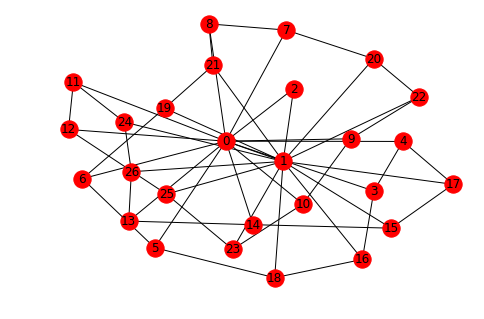

In [24]:
# Review an example

plot_given_edges(rep27[0])

In [25]:
# Confirm this has saturated vertex 1 in all examples
deg_of_1 = [sum(r[1]) for r in rep27]
assert min(deg_of_1) == 14
assert max(deg_of_1) == 14

# Continuing to grow

The logic will now seek to introduce neighbours for vertex 3 rather than vertex 2, since it is of higher degree. 


In [26]:
%time rep28 = find_valid_supergraphs_greedy(rep27, verbose=False)

2020-05-07 07:59:29.549456: Starting with 11 seeds
2020-05-07 07:59:30.708359: 131 valid graphs from templates
2020-05-07 07:59:30.732267: Reduced to 66 representatives
Wall time: 1.18 s


In [27]:
%time rep29 = find_valid_supergraphs_greedy(rep28, verbose=False)

2020-05-07 07:59:30.739246: Starting with 66 seeds
2020-05-07 08:00:04.310511: 5871 valid graphs from templates
2020-05-07 08:00:05.374706: Reduced to 3588 representatives
Wall time: 34.6 s


In [28]:
%time rep30 = find_valid_supergraphs_greedy(rep29, verbose=False)

2020-05-07 08:00:05.380688: Starting with 3588 seeds
2020-05-07 08:34:15.504278: 296543 valid graphs from templates
2020-05-07 08:35:08.785867: Reduced to 223200 representatives
Wall time: 35min 3s


Expect we would hit the memory issue if we proceeded with this many seeds!

In [30]:
pickle.dump( rep30, open( "fullsearch_sat-30.p", "wb" ) )